# Importing methods

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

%matplotlib inline 

## Reading data

In [2]:
data_mushrooms = pd.read_csv('mushroom_data.csv')

# Define columnnames
col_names = ['poisonous', 'cap-shape', 'cap-surface','cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 
         'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 
         'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 
         'spore-print-color', 'population', 'habitat']
data_mushrooms.columns = col_names

# Renaming values
replacements = {
    'poisonous': {'p': 0, 'e': 1}, 
    'cap-shape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'},
    'cap-surface': {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
    'cap-color': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'bruises': {'t': 'bruises', 'f': 'no'},
    'odor': {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'},
    'gill-attachment': {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'},
    'gill-spacing': {'c': 'close', 'w': 'crowded', 'd': 'distant'},
    'gill-size': {'b': 'broad', 'n': 'narrow'},
    'gill-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-shape': {'e': 'enlarging', 't': 'tapering'},
    'stalk-root': {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted'},
    'stalk-surface-above-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-surface-below-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-color-above-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-color-below-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'veil-type': {'p': 'partial', 'u': 'universal'},
    'veil-color': {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
    'ring-number': {'n': 'none', 'o': 'one', 't': 'two'},
    'ring-type': {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'},
    'spore-print-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'},
    'population': {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'},
    'habitat': {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}
}
data_mushrooms.replace(replacements, inplace=True)

display(data_mushrooms)

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,1,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,1,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,0,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,1,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,1,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,1,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,0,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


## Cleaning data

In [3]:
# Changing missing values to NaN values
data_mushrooms = data_mushrooms.replace('?', np.nan)

# Total missing values
total_missing_mushrooms = data_mushrooms.isnull().sum().sum()
print("Total number of missing values: ", total_missing_mushrooms)

# Number of records not complete
missing_records_mushrooms = data_mushrooms.shape[0] - data_mushrooms.dropna().shape[0]
print("Total number of incomplete records: ", missing_records_mushrooms)

# Missing values per column
missing_values_mushrooms = data_mushrooms.isnull().sum().to_frame().rename(columns = {0: 'count'})
display(missing_values_mushrooms)

# Check how many unique values there are per column
unique_values_mushrooms = data_mushrooms.nunique().to_frame().rename(columns = {0: 'count'})
display(unique_values_mushrooms)

Total number of missing values:  2480
Total number of incomplete records:  2480


,count
poisonous,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


,count
poisonous,2
cap-shape,6
cap-surface,4
cap-color,10
bruises,2
odor,9
gill-attachment,2
gill-spacing,2
gill-size,2
gill-color,12


In [4]:
# All missing values in column 'stalk_root' + veil-type all same value, so remove those columns
data_mushrooms = data_mushrooms.drop(['stalk-root', 'veil-type'], axis = 1)
col_names.remove('stalk-root')
col_names.remove('veil-type')

## Data analysis

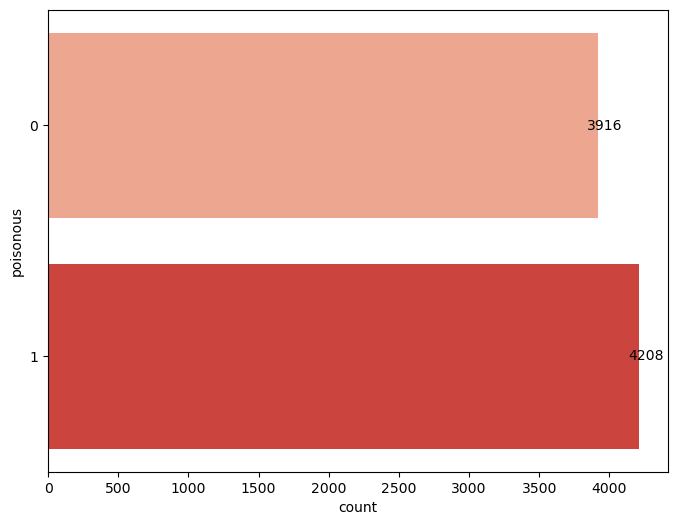

In [5]:
# Checking if their is imbalance in dataset
plt.figure(figsize = (8, 6))
sns.countplot(data = data_mushrooms, y = 'poisonous', palette = 'Reds')

# Add annotations for each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', 
                       va='center', fontsize=10, color='black', xytext=(5, 0), textcoords='offset points')
    
plt.show()

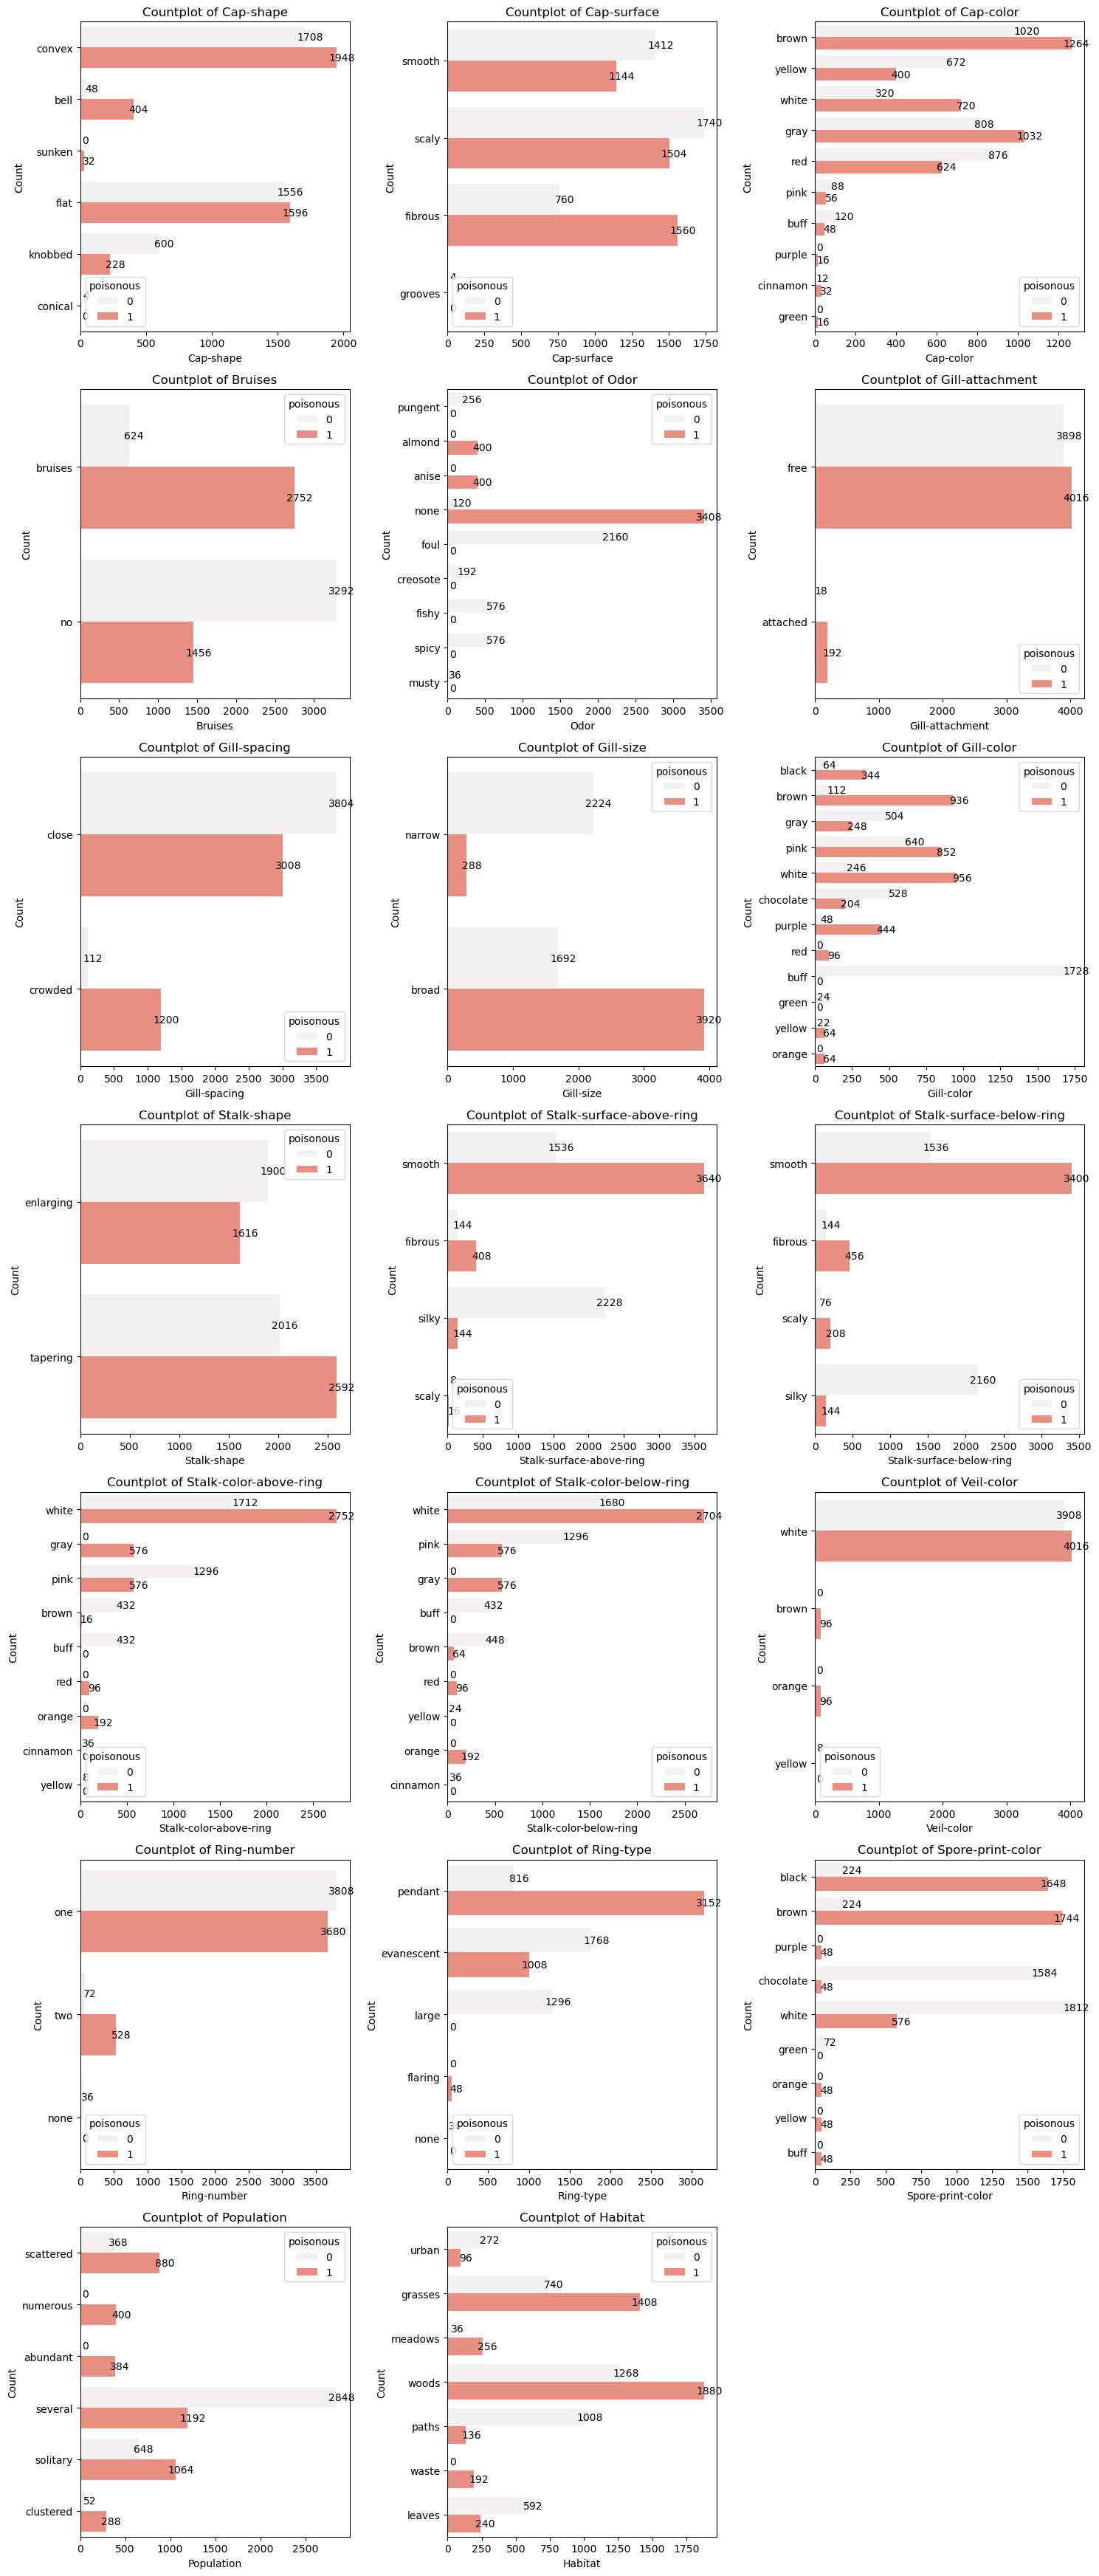

In [6]:
# Determine the number of rows and columns for the subplot grid
num_features = len(col_names[1:])
num_cols = 3  # Adjust the number of columns as desired
num_rows = (num_features - 1) // num_cols + 1

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot countplots for each feature
for i, feature in enumerate(col_names[1:]):
    sns.countplot(data=data_mushrooms, y = feature, hue = 'poisonous', color = 'salmon', ax = axes[i])
    axes[i].set_title(f"Countplot of {feature.capitalize()}")
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel("Count")
    
    # Add annotations for each bar
    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', 
                         va='center', fontsize=10, color='black', xytext=(5, 0), textcoords='offset points')

# Remove any unused subplots
for j in range(num_features, num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

## Splitting test and training data

In [53]:
# Separate features and target variable
X = data_mushrooms.drop(columns=['poisonous'])
y = data_mushrooms['poisonous']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training data into training and validation sets (if necessary)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=42)

In [54]:
# # One-hot encode categorical features by logic
# one_hot_encoding_columns = ['cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-attachment', 'gill-spacing', 
#                             'gill-size', 'gill-color', 'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 
#                             'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-type', 'spore-print-color',
#                             'population', 'habitat']

# # Label encode categorical features
# label_encoding_columns = ['bruises', 'ring-number']

# # Columns for one-hot encoding from ChatGPT
# one_hot_encoding_columns = ['cap-shape', 'cap-surface', 'bruises', 'gill-attachment', 'gill-spacing', 
#                             'gill-size', 'stalk-shape', 'veil-color', 'ring-number', 'population']

# # Columns for label encoding
# label_encoding_columns = ['cap-color', 'odor', 'gill-color', 'stalk-surface-above-ring', 
#                           'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 
#                           'ring-type', 'spore-print-color', 'habitat']

# Columns for label encoding (only label encoding)
label_encoding_columns = ['cap-shape', 'cap-surface','cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 
         'gill-size', 'gill-color', 'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 
         'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 
         'spore-print-color', 'population', 'habitat']

# # Apply one-hot encoding with integer encoding
# X_train = pd.get_dummies(X_train, columns=one_hot_encoding_columns, dtype=int)
# X_test = pd.get_dummies(X_test, columns=one_hot_encoding_columns, dtype=int)
# X_val = pd.get_dummies(X_val, columns=one_hot_encoding_columns, dtype=int)

# Apply label encoding
label_encoder = LabelEncoder()
for col in label_encoding_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.fit_transform(X_test[col])
    X_val[col] = label_encoder.fit_transform(X_val[col])

In [55]:
# Setting the amount of features to use
top_n = 25

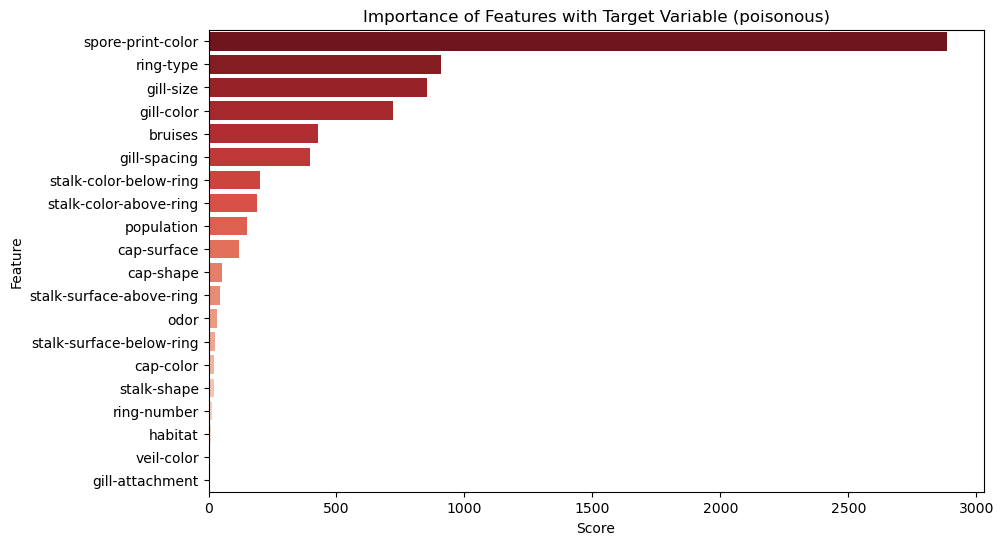

In [56]:
# Checking for feature importance using Chi-squared test
best_features = SelectKBest(score_func = chi2, k = 'all')
fit = best_features.fit(X_train, y_train)

# Get scores and feature names
scores_feature = pd.DataFrame({'Feature': X_train.columns, 'Score': fit.scores_})
scores_feature = scores_feature.sort_values(by = 'Score', ascending = False)

# Select the top N features
top_features_chi2 = scores_feature.nlargest(top_n, 'Score')

# Create the countplot
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Score', y = 'Feature', data = top_features_chi2, palette = 'Reds_r')
plt.title('Importance of Features with Target Variable (poisonous)')
plt.show()

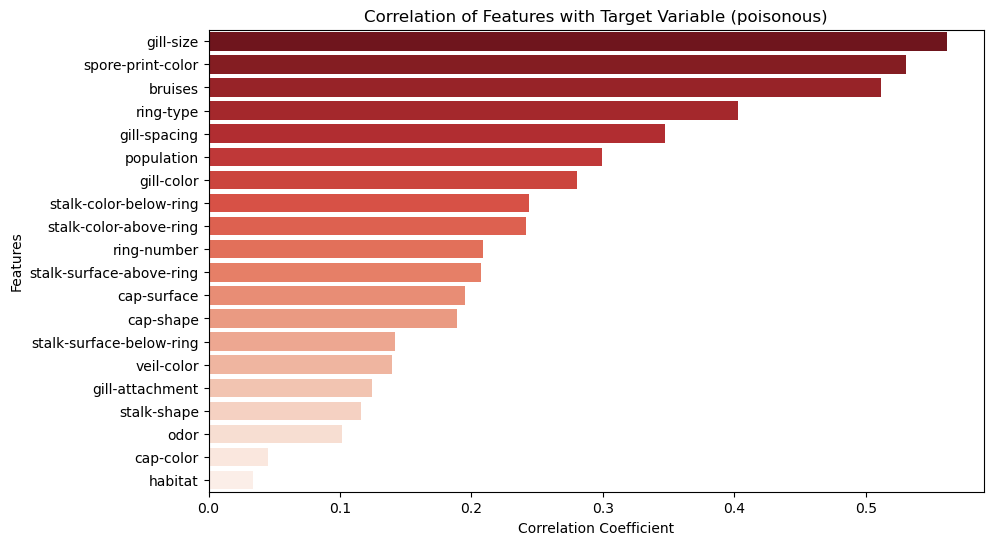

In [57]:
# Checking for correlation
corr_matrix = pd.concat([X_train, y_train], axis=1).corr()

# Extract correlation coefficients between each feature and the target variable from the correlation matrix
feature_target_corr = corr_matrix['poisonous'].drop('poisonous')

# Sort features by absolute correlation coefficients
sorted_features_corr = feature_target_corr.abs().sort_values(ascending=False)
top_features_corr = sorted_features_corr[:top_n]

# Plot bar chart
plt.figure(figsize = (10, 6))
sns.barplot(x = top_features_corr.values, y = top_features_corr.index, palette = 'Reds_r')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.title('Correlation of Features with Target Variable (poisonous)')
plt.show()

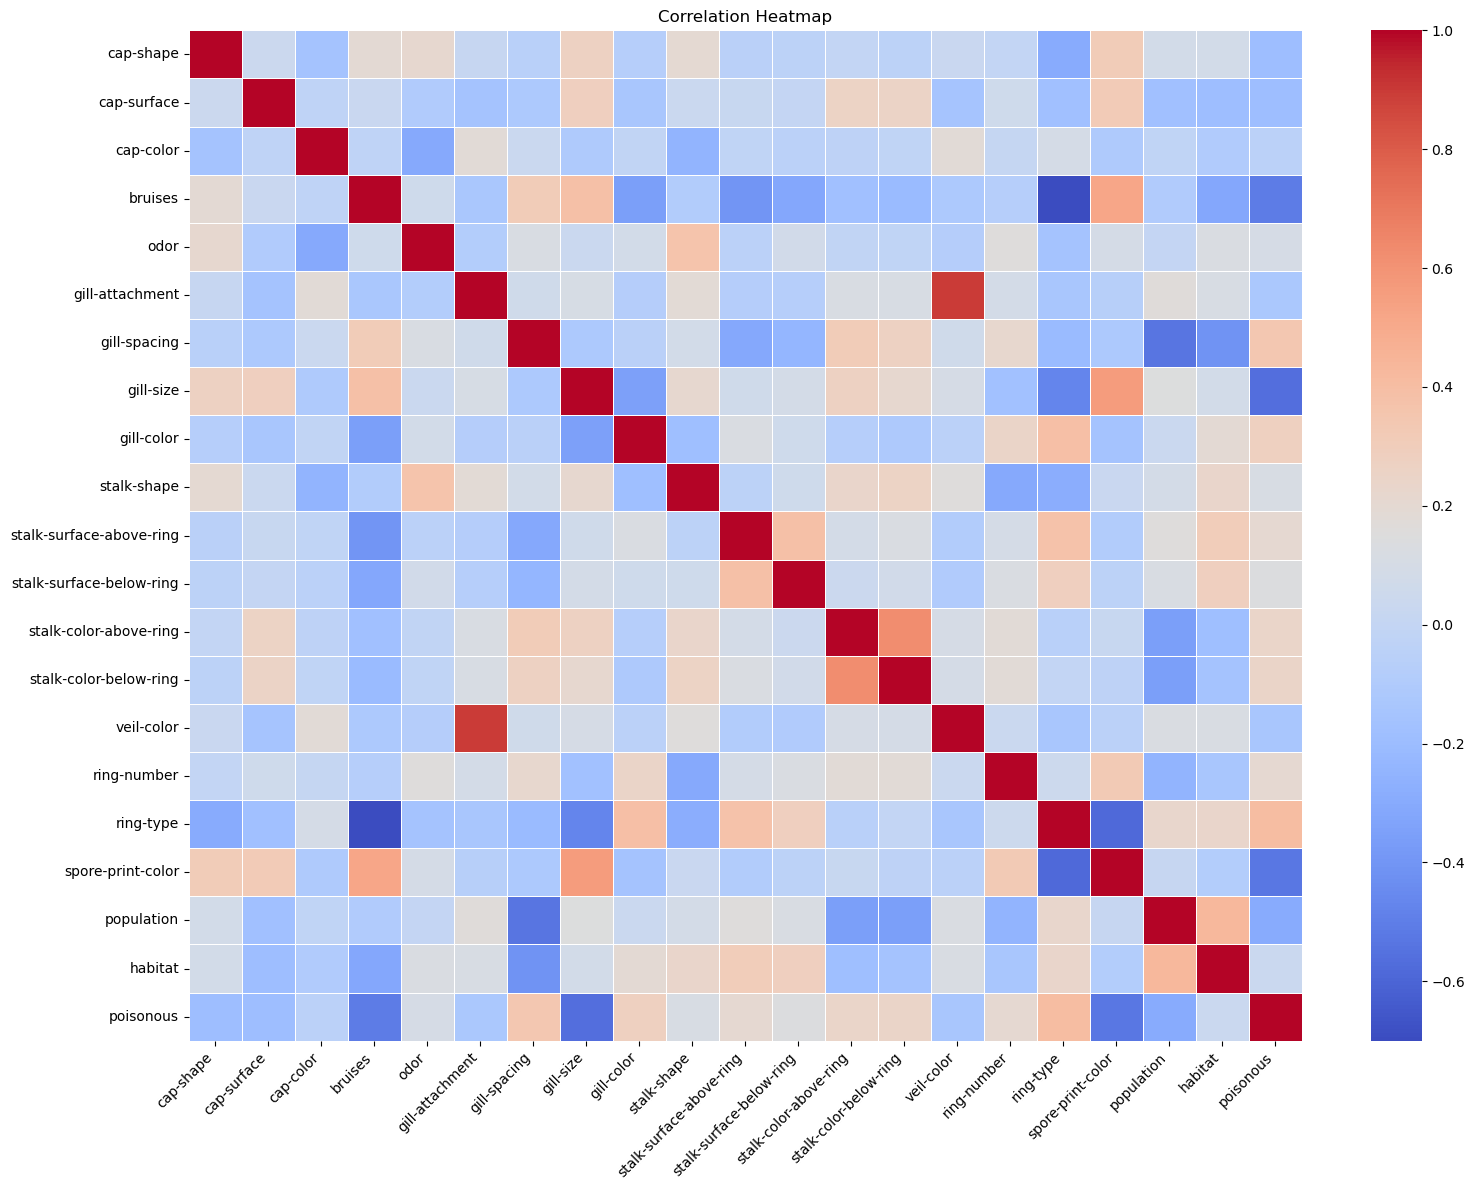

In [58]:
# Heatmap for total correlation
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5)

# Adjust plot settings
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [59]:
# Checking for similarity in Chi-square test and correlation
common_top_features = set(top_features_chi2['Feature'].tolist()).intersection(top_features_corr.index.tolist())
uncommon_top_features = set(top_features_chi2['Feature'].tolist()) ^ set(top_features_corr.index.tolist())

# Create a DataFrame to store the uncommon features and their source
uncommon_features_df = pd.DataFrame({'Feature': list(uncommon_top_features)})

# Add a column to indicate the source of each uncommon feature
uncommon_features_df['Source'] = uncommon_features_df['Feature'].apply(
    lambda x: 'Chi-Squared' if x in top_features_chi2['Feature'].tolist() else 'Correlation'
)

display(pd.DataFrame(common_top_features).rename(columns = {0: 'Common features'}))
display(uncommon_features_df)

,Common features
0,population
1,gill-color
2,bruises
3,cap-shape
4,habitat
5,stalk-surface-above-ring
6,stalk-surface-below-ring
7,ring-type
8,gill-attachment
9,ring-number


,Feature,Source


## Selecting features for models

In [60]:
display(X_train)
display(X_val)
display(X_test)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
9,0,3,9,0,0,1,0,0,4,0,3,3,7,7,2,1,4,0,3,2
4903,1,2,7,1,3,1,0,1,2,1,2,2,5,7,2,1,0,7,4,3
1716,1,2,8,0,1,1,0,0,10,0,3,3,7,7,2,1,4,0,2,0
2326,2,0,0,0,6,1,0,0,10,1,3,3,3,7,2,1,4,1,5,6
7046,3,0,3,1,6,1,1,0,7,0,3,2,7,7,2,2,4,7,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4437,2,0,3,1,4,1,0,0,4,0,2,2,1,0,2,1,2,3,4,0
7551,3,3,7,1,3,1,0,1,2,1,3,3,7,5,2,1,0,7,4,3
1828,1,3,3,1,6,1,1,0,7,1,0,3,7,7,2,1,0,1,0,0
6788,2,3,7,1,4,1,0,1,2,1,3,3,7,5,2,1,0,7,4,6


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
4964,3,3,1,0,6,1,0,0,10,0,3,3,7,6,2,2,0,7,1,5
7975,0,0,8,1,6,1,1,0,4,0,3,2,7,7,2,2,4,7,2,0
5053,3,2,1,0,6,1,0,0,10,0,3,3,6,7,2,2,0,7,1,5
1334,3,3,8,1,6,1,1,0,3,1,3,3,7,7,2,1,0,0,0,0
5161,2,3,1,0,4,1,0,0,7,1,0,3,7,7,2,1,4,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,3,2,7,1,3,1,0,1,2,1,3,2,5,5,2,1,0,7,4,1
8033,4,2,0,1,4,1,0,1,2,1,3,3,5,7,2,1,0,7,4,1
6150,2,3,0,1,8,1,0,1,2,1,3,3,5,5,2,1,0,7,4,6
7608,4,2,0,1,3,1,0,1,2,1,3,3,7,5,2,1,0,7,4,1


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1971,3,0,0,1,6,1,1,0,3,1,3,0,7,7,2,1,0,1,3,0
6654,3,3,7,1,3,1,0,1,2,1,3,3,5,5,2,1,0,7,4,1
5606,2,2,0,1,4,1,0,1,2,1,2,3,7,5,2,1,0,7,4,1
3332,3,2,3,0,6,1,0,0,1,1,3,3,3,5,2,1,4,1,5,6
6988,3,3,7,1,8,1,0,1,2,1,3,3,5,5,2,1,0,7,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7374,4,3,7,1,4,1,0,1,2,1,2,3,5,7,2,1,0,7,4,3
1149,3,3,0,1,6,1,1,0,3,1,0,3,7,7,2,1,0,0,0,0
4999,2,2,0,1,4,1,0,1,2,1,2,2,5,5,2,1,0,7,4,3
7497,4,2,0,1,3,1,0,1,2,1,3,2,5,5,2,1,0,7,4,3


In [61]:
# # Select top n features
# top_features = top_features_chi2['Feature'].tolist()

# # Filter X_train, X_test, and X_val datasets to keep only the top n features
# X_train = X_train[top_features]
# X_test = X_test[top_features]
# X_val = X_val[top_features]

In [62]:
def evaluate_classifier(classifier, X_val, y_val):
    # Evaluate the model on the validation set
    y_pred = classifier.predict(X_val)

    # Show confusion matrix
    conf_matrix = confusion_matrix(y_val, y_pred)
    print(f'Confusion Matrix for {classifier}:\n{conf_matrix}')

    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_pred)
    print(f'Validation Set Accuracy: {accuracy:.2f}')

    # Calculate precision
    precision = precision_score(y_val, y_pred)
    print(f'Validation Set Precision: {precision:.2f}')

    # Calculate recall
    recall = recall_score(y_val, y_pred)
    print(f'Validation Set Recall: {recall:.2f}')

    # Calculate F1-score
    f1 = f1_score(y_val, y_pred)
    print(f'Validation Set F1-Score: {f1:.2f}')

    # Perform cross-validation and print mean accuracy
    cv_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')
    print("Cross-Validation Mean Accuracy:", np.mean(cv_scores))
    print()

def ROC_curve(classifier, X_val, y_val):
    y_proba = classifier.predict_proba(X_val)[:, 1]
    fpr, tpr, _ = roc_curve(y_val, y_proba)
    roc_auc = roc_auc_score(y_val, y_proba)
    print()
    return fpr, tpr, roc_auc

## Logistic regression

Models (Gridsearch already performed, just fill in parameters automatically)

In [63]:
# # Scale the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_train)

# Initialize the Logistic Regression classifier with specific parameters
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on the training data
logistic_regression.fit(X_train, y_train)

# Evaluate model
evaluate_classifier(logistic_regression, X_val, y_val)

Confusion Matrix for LogisticRegression(max_iter=1000, random_state=42):
[[1151   95]
 [  77 1277]]
Validation Set Accuracy: 0.93
Validation Set Precision: 0.93
Validation Set Recall: 0.94
Validation Set F1-Score: 0.94
Cross-Validation Mean Accuracy: 0.9369072775748



## Decision tree

In [64]:
# Initialize the Decision Tree classifier with specific parameters
decision_tree = DecisionTreeClassifier(
    criterion='gini',  # You can use 'entropy' if you prefer
    max_depth=None,     # None means no maximum depth
    min_samples_split=2,
    min_samples_leaf=1
)

# Fit the model on the training data
decision_tree.fit(X_train, y_train);

# Evaluate model
evaluate_classifier(decision_tree, X_val, y_val)

Confusion Matrix for DecisionTreeClassifier():
[[1246    0]
 [   0 1354]]
Validation Set Accuracy: 1.00
Validation Set Precision: 1.00
Validation Set Recall: 1.00
Validation Set F1-Score: 1.00
Cross-Validation Mean Accuracy: 1.0



In [65]:
# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
random_forest.fit(X_train, y_train);

# Evaluate model
evaluate_classifier(random_forest, X_val, y_val)

Confusion Matrix for RandomForestClassifier(random_state=42):
[[1246    0]
 [   0 1354]]
Validation Set Accuracy: 1.00
Validation Set Precision: 1.00
Validation Set Recall: 1.00
Validation Set F1-Score: 1.00
Cross-Validation Mean Accuracy: 1.0



In [66]:
# Initialize the Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training data
gradient_boosting.fit(X_train, y_train);

# Evaluate model
evaluate_classifier(gradient_boosting, X_val, y_val)

Confusion Matrix for GradientBoostingClassifier(random_state=42):
[[1246    0]
 [   0 1354]]
Validation Set Accuracy: 1.00
Validation Set Precision: 1.00
Validation Set Recall: 1.00
Validation Set F1-Score: 1.00
Cross-Validation Mean Accuracy: 1.0



## KNN

In [67]:
# # Initialize the KNN classifier with specific parameters
# knn_classifier = KNeighborsClassifier(
#     n_neighbors=5,
#     p=1,
#     weights='uniform'
# )

# # Fit the model on the training data
# knn_classifier.fit(X_train, y_train)

# # Evaluate the model on the test set
# y_pred = knn_classifier.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Test Set Accuracy: {accuracy:.2f}')

# # Perform cross-validation and print mean accuracy
# cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5, scoring='accuracy')
# print("Cross-Validation Mean Accuracy:", cv_scores.mean())


## Plotting ROC curves

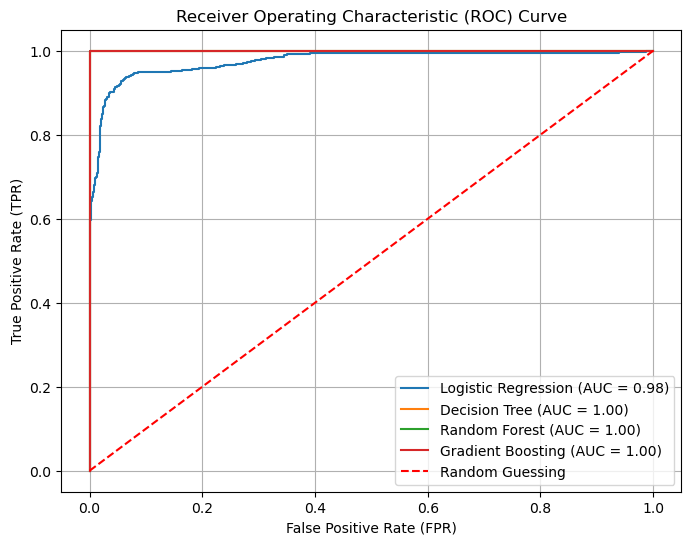

In [68]:
# Plot ROC curves
fpr_lr, tpr_lr, roc_auc_lr = ROC_curve(logistic_regression, X_val, y_val)
fpr_dt, tpr_dt, roc_auc_dt = ROC_curve(decision_tree, X_val, y_val)
fpr_rf, tpr_rf, roc_auc_rf = ROC_curve(random_forest, X_val, y_val)
fpr_gb, tpr_gb, roc_auc_gb = ROC_curve(gradient_boosting, X_val, y_val)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')

# Add labels and legend
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()